In [2]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import scipy.stats as st
#import functions as fun

In [3]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [4]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .97
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .8
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .01
mpl.rcParams['figure.figsize']        = 7,2.5


cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [5]:
#Get 1x1 degree grid
with xr.open_dataset('../rawdata/rsl_85_2090.nc') as ds:
    lon = ds['x'].values
    lat = ds['y'].values
    slr_md = ds['slr_md'].values

#Get fingerprints
with xr.open_dataset('../rawdata/fp_uniform/AIS.nc') as ds:
    lon05  = ds['x'].values
    lat05  = ds['y'].values
    fp05_a = ds['rsl'].values
with xr.open_dataset('../rawdata/fp_uniform/GrIS.nc') as ds:
    fp05_gr = ds['rsl'].values
fp05_gl = np.zeros((19,len(lat05),len(lon05)))
for r in range(1,20):
    with xr.open_dataset(f'../rawdata/fp_uniform/RGI_{r}.nc') as ds:
        fp05_gl[r-1,:,:] = ds['rsl'].values

#Convert to 1x1 degree grid
fp_a  = np.zeros((len(lat),len(lon)))
fp_gr = np.zeros((len(lat),len(lon)))
fp_gl = np.zeros((19,len(lat),len(lon)))

for i,ii in enumerate(lat):
    ig = np.argmin((ii-lat05)**2)
    for j,jj in enumerate(lon):
        jg = np.argmin((jj-lon05)**2)
        fp_a[i,j] = fp05_a[ig,jg]
        fp_gr[i,j] = fp05_gr[ig,jg]
        fp_gl[:,i,j] = fp05_gl[:,ig,jg]

In [6]:
def nanvar(var):
    vvar = np.nanvar(var,axis=0)
    vvar[np.isnan(slr_md)]=np.nan
    return vvar

In [7]:
def get_var(scen):
    with xr.open_dataset(f'../data/rsl/{mods[0]}_{scen}.nc') as ds:
        lon = ds['lon'].values
        lat = ds['lat'].values
    stdn = np.zeros((len(mods),len(lat),len(lon)))
    glac = np.zeros((len(mods),len(lat),len(lon)))
    gsmb = np.zeros((len(mods),len(lat),len(lon)))
    asmb = np.zeros((len(mods),len(lat),len(lon)))
    adyn = np.zeros((len(mods),len(lat),len(lon)))
    
    for m,model in enumerate(mods):
        with xr.open_dataset(f'../data/rsl/{model}_{scen}.nc') as ds:
            stdn[m,:,:] = np.nanmean(ds['stdn'][-20:,:,:].values,axis=0)
            glac[m,:,:] = np.nanmean(ds['glac'][-20:,:,:].values,axis=0)  
            gsmb[m,:,:] = np.nanmean(ds['gsmb'][-20:,:,:].values,axis=0)
            asmb[m,:,:] = np.nanmean(ds['asmb'][-20:,:,:].values,axis=0)
            adyn[m,:,:] = np.nanmean(ds['adyn'][-20:,:,:].values,axis=0)
            
    vstdn = nanvar(stdn)
    vglac = nanvar(glac)
    vgsmb = nanvar(gsmb)
    vasmb = nanvar(asmb)
    vadyn = nanvar(adyn)
    vslr = nanvar(stdn+glac+gsmb+asmb+adyn)
    
    return vstdn,vglac,vgsmb,vasmb,vadyn,vslr

In [8]:
def get_srocc(scen):
    file = f'../../srocc/data/component-ts-slr-{scen[-2:]}.nc'
    with xr.open_dataset(file) as ds:
        var_h = np.nanmean(ds['greendyn_h'][-20:,:,:].values,axis=0)
        var_l = np.nanmean(ds['greendyn_l'][-20:,:,:].values,axis=0)
        vgdyn = (100*.5*np.abs((var_h-var_l))/1.645)**2         
        
        var_h = np.nanmean(ds['grw_h'][-20:,:,:].values,axis=0)
        var_l = np.nanmean(ds['grw_l'][-20:,:,:].values,axis=0)
        vgrw = (100*.5*np.abs((var_h-var_l))/1.645)**2      

        vgia = (100*np.nanmean(ds['gia_sd'][-20:,:,:].values,axis=0))**2

    return vgdyn,vgrw,vgia

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice.
  
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing th

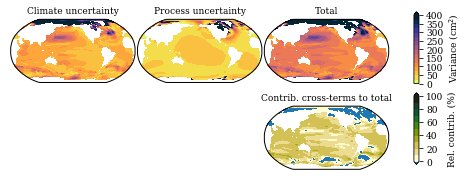

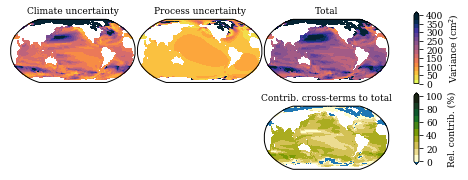

In [20]:
cmap1 = plt.get_cmap('cmo.thermal_r',16)
cmap2 = plt.get_cmap('cmo.speed',10)
cmap2.set_under('tab:blue')
vmax = 400
vmax2 = 100

for scen in ['rcp45','rcp85']:
    
    fig = plt.figure()
    
    vstdn,vglac,vgsmb,vasmb,vadyn,vslr = get_var(scen)
    vres = vslr-vstdn-vglac-vgsmb-vasmb-vadyn
    vgdyn,vgrw,vgia = get_srocc(scen)
    
    vclim = vslr
    vproc = vglac+vgsmb+vasmb+vadyn+vgdyn+vgrw+vgia
    vtot  = vclim+vproc
    
    ax = fig.add_subplot(231,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,vclim,transform=ccrs.PlateCarree(),vmin=0,vmax=400,cmap=cmap1)
    ax.set_title('Climate uncertainty')
    
    ax = fig.add_subplot(232,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,vproc,transform=ccrs.PlateCarree(),vmin=0,vmax=400,cmap=cmap1)
    ax.set_title('Process uncertainty')
    
    ax = fig.add_subplot(233,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,vtot,transform=ccrs.PlateCarree(),vmin=0,vmax=400,cmap=cmap1)
    ax.set_title('Total')
    
#    ax = fig.add_subplot(234,projection=ccrs.Robinson(central_longitude=200))
#    im = ax.pcolormesh(lon,lat,vres,transform=ccrs.PlateCarree(),vmin=0,vmax=400,cmap=cmap1)
#    ax.set_title('Cross-terms')
    
    cax = fig.add_axes([.85,.55,.01,.4])
    cb = plt.colorbar(im,cax=cax,extend='max')
    cb.set_label('Variance (cm$^2$)')
    
    ax = fig.add_subplot(236,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,100*vres/vtot,transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap=cmap2)
    ax.set_title('Contrib. cross-terms to total')
    
    cax = fig.add_axes([.85,.1,.01,.4])
    cb = plt.colorbar(im,cax=cax,extend='both')
    cb.set_label('Rel. contrib. (%)')
    
    plt.savefig(f'../figures/plot_optionB_{scen}',dpi=600)
    plt.show()
    plt.close()    